# 통계적 추정

추론통계에는 추정과 검정이 있다.  
여기서는 추정을 설명하도록 한다. 추정은 다시 점추정과 구간추정으로 나뉜다.  
* 점추정 : 추정하고 싶은 모평균, 모분산이라는 모수를 하나의 수치로 추정한다.
* 구간추정 : 모수를 추정할때 구간으로 추정한다. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

400명 학생의 성적을 불러 들인다.

In [2]:
df = pd.read_csv('./data/ch4_scores400.csv')
scores = np.array(df['score'])

모평균과 모분산을 먼저 구해본다. 

In [3]:
p_mean = np.mean(scores) # 모평균
p_var = np.var(scores) # 모분산

p_mean, p_var

(69.53, 206.6691)

400명 학생의 성적분포는 정규분포에 근사한다.

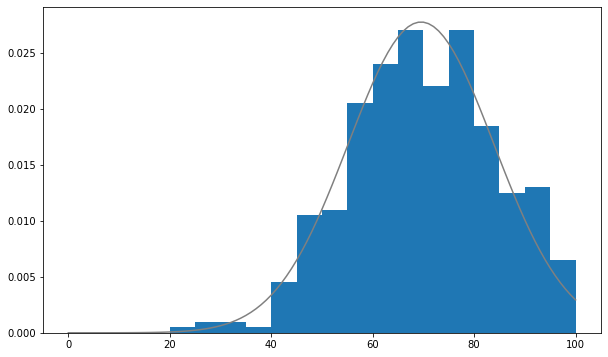

In [4]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.arange(101)
rv = stats.norm(p_mean, np.sqrt(p_var))
ax.plot(xs, rv.pdf(xs), color='gray')
ax.hist(scores, bins=20, range=(0, 100), density=True)

plt.show()

### 표본의 추출

400명 중 20명에 대한 임의 추출 표본을 생성한다. 

In [5]:
np.random.seed(0)
n = 20
sample = np.random.choice(scores, n)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81], dtype=int64)

표본의 크기가 20인 표본데이터를 10000개 생성한다. 

In [6]:
np.random.seed(1111)
n_samples = 10000
samples = np.random.choice(scores, (n_samples, n))

## 점추정

### 모평균의 점추정

10000개 표본에서 표본의 평균을 확인해 보면 다음과 같다.  
표본평균의 기대값은 모평균과 같다.

$$ E(\bar X) = \mu $$

표본의 평균은 모평균의 불편추정량(unbiased estimator)이다.  

In [7]:
for i in range(5):
    s_mean = np.mean(samples[i])
    print(f'{i+1}번째 표본평균: {s_mean:.3f}')

1번째 표본평균: 67.000
2번째 표본평균: 72.850
3번째 표본평균: 69.200
4번째 표본평균: 64.450
5번째 표본평균: 72.650


In [8]:
sample_means = np.mean(samples, axis=1)
np.mean(sample_means)

69.53799999999998

표본의 크기 n을 증가시키면 표본의 평균은 모평균에 수렴한다. 이를 일치추정량(consistent estimator)라고 한다. 

In [9]:
np.mean(np.random.choice(scores, int(1e6))) # 표본의 크기를 100만

69.542954

In [10]:
s_mean = np.mean(sample) # 위에서 생성한 n=20에서의 표본평균
s_mean

70.4

### 모분산의 점추정

표본의 분산 $ S^2 = \dfrac{1}{n}\sum_{i=1}^n(X - \bar X)^2$은 모분산에 대한 불편추정량이 아니다. 

In [11]:
for i in range(5):
    s_var = np.var(samples[i])
    print(f'{i+1}번째 표본분산: {s_var:.3f}')

1번째 표본분산: 116.800
2번째 표본분산: 162.928
3번째 표본분산: 187.060
4번째 표본분산: 149.148
5번째 표본분산: 111.528


In [12]:
sample_vars = np.var(samples, axis=1)
np.mean(sample_vars) # 모분산에 비하여 작은 값이 나온다.

196.34417850000003

#### 불편분산

모평균의 불편추정량은 불편분산이다.

$$s^2 = \dfrac{1}{n-1}\sum_{i=1}^n(X - \bar X)^2 $$

이때 n-1을 자유도(degree of freedom)이라고 한다.   
numpy에서는 var함수의 ddof=1을 지정하므로 불편분산을 계산할 수 있다. 

In [13]:
sample_u_vars = np.var(samples, axis=1, ddof=1)
np.mean(sample_u_vars)

206.67808263157895

불편분산은 표본의 크기 n= 100만일때 모분산에 수렴하는 일치추정량임을 알 수 있다. 

In [14]:
np.var(np.random.choice(scores, int(1e6)), ddof=1)

207.08336592317

In [15]:
u_var = np.var(sample, ddof=1) # 위에서 생성한 n=20에서의 불편분산
u_var

158.25263157894742

## 구간추정

### 정규분포의 모평균(분산을 알고 있는)의 구간추정

<img src="./images/구간추정.png"  width="500" height="170">
<img src="./images/구간추정1.png"  width="300" height="170">

In [16]:
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(p_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(p_var/n)

lcl, ucl

(64.09956018535247, 76.70043981464754)

95%신뢰구간을 구하면 [64.1 , 76.7]임을 알수 있다.  
이것은 구간추정을 여러번하면 100번 중 95번의 비율로 모평균이 해당 신뢰구간 안에 속한다는 뜻이다. 
아래 그래프에서 보듯이 모평균을 포함하지 않는 신뢰구간이 있을 수 있다. 

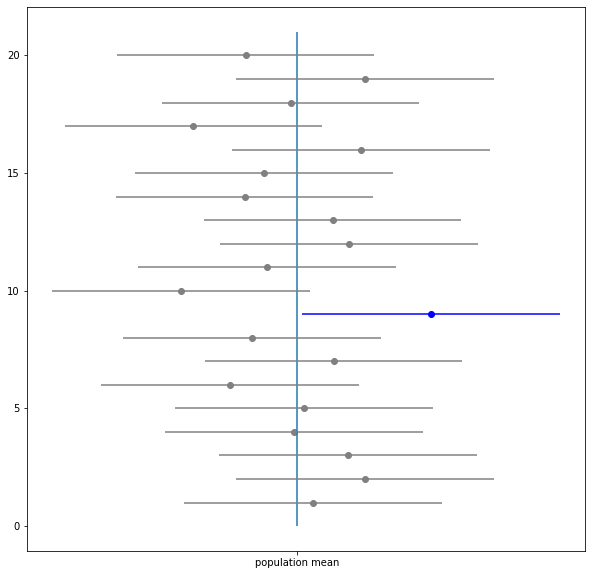

In [17]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

rv = stats.norm()
n_samples = 20
ax.vlines(p_mean, 0, 21)
for i in range(n_samples):
    sample_ = samples[i]
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975) * np.sqrt(p_var/n)
    if lcl <= p_mean <= ucl:
        ax.scatter(s_mean_, n_samples-i, color='gray')
        ax.hlines(n_samples-i, lcl, ucl, color='gray')
    else:
        ax.scatter(s_mean_, n_samples-i, color='b')
        ax.hlines(n_samples-i, lcl, ucl, color='b')
ax.set_xticks([p_mean])
ax.set_xticklabels(['population mean'])

plt.show()

신뢰구간을 1만번 계산하고 신뢰구간이 모평균을 포함한 것은 몇 % 인지를 시뮬레이션해보면 다음과 같다. 약 95%가 모평균을 포함하고 있는 것일 알 수 있다. 

In [18]:
rv = stats.norm()
cnt = 0

for sample_ in samples:
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975) * np.sqrt(p_var/n)
    if lcl <= p_mean <= ucl:
        cnt += 1
cnt / len(samples)

0.951

### 정규분포의 모평균(모분산을 알지 못하는) 구간추정

<img src="./images/구간추정2.png"  width="500" height="170">
<img src="./images/구간추정3.png"  width="300" height="170">
<img src="./images/구간추정4.png"  width="300" height="170">


In [19]:
rv = stats.t(df=n-1) # 자유도가 n-1인 t분포
lcl = s_mean - rv.isf(0.025) * np.sqrt(u_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(u_var/n)

lcl, ucl

(64.51244886603887, 76.28755113396114)

### 모비율의 구간추정

모비율은 베르누이 분포의 모평균의 구간추정과 동일하다.  
모집단의 비율을 p라고 하면 출구조사나 길거리 설문조사에서 얻은 이진변수는 Bern(p)를 따르는 확률변수라고 생각할 수 있다. 

모평균의 신뢰수준 100(1-$\alpha$)%의 신뢰구간은 다음과 같다.

<img src="./images/구간추정5.jpg">

예를들어 다음 데이터는 "어느 기업이 출시한 상품 A에 대해서 알고 있는가?"를 시민 1000명에게 응답받은 내용이다. 이를 통해 상품 A에 대한 국민의 인지도 p를 추정해보자.

In [20]:
enquete_df = pd.read_csv('./data/ch10_enquete.csv')
enquete = np.array(enquete_df['known'])
n = len(enquete)
enquete[:10]

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [21]:
# 모비율의 점추정
s_mean = enquete.mean()
s_mean

0.709

In [22]:
# 모비율의 구간추정
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean*(1-s_mean)/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean*(1-s_mean)/n)

lcl, ucl

(0.6808474522924337, 0.7371525477075662)

## 정규분포의 모분산 구간추정

$$ \dfrac{(n-1)S^2}{\sigma^2} \thicksim  \chi^2(n-1)$$ 이 성립한다. 

즉, 표본분산과 모분산의 비율에 (n-1)을 곱한 확률변수의 분포가 자유도 (n-1)인 카이제곱 분포이다. 

<img src="./images/구간추정6.png" width="300">

앞서 구한 표본 분산$S^2$, sample_u_vars과 모분산 $\sigma^2$, p_var 에 대하여 다음과 같은 데이터를 생성한다.   
이 분포는 $ \dfrac{(n-1)S^2}{\sigma^2} \thicksim  \chi^2(n-1)$인 카이제곱 분포임을 알 수 있다. 

In [31]:
n = 20
sample_y = sample_u_vars * (n-1) / p_var
sample_y

array([11.303, 15.767, 18.102, ..., 19.435,  9.265, 18.625])

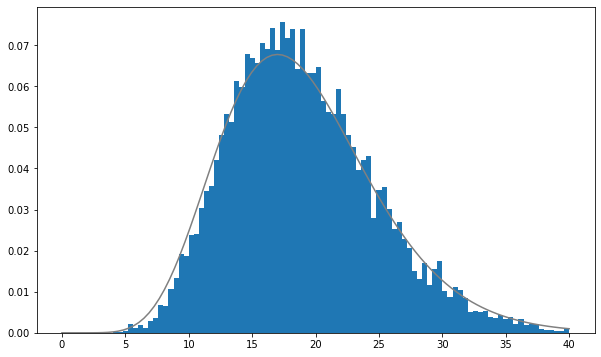

In [32]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 40, 100)
rv = stats.chi2(df=n-1)
ax.plot(xs, rv.pdf(xs), color='gray')
hist, _, _ = ax.hist(sample_y, bins=100,
                     range=(0, 40), density=True)

plt.show()

In [33]:
# 모분산의 신뢰구간 계산
rv = stats.chi2(df=n-1)
lcl = (n-1) * u_var / rv.isf(0.025)
hcl = (n-1) * u_var / rv.isf(0.975)

lcl, hcl

(91.52471947132238, 337.5955129124592)

카이제곱분포가 왼쪽으로 치우치고 오른쪽으로 넓어지는 분포이므로 불편분산에 대해 오른 쪽은 폭이 길고 불편분산이 클수록 구간 추정의 폭이 길다는 것을 확인할 수 있다. 

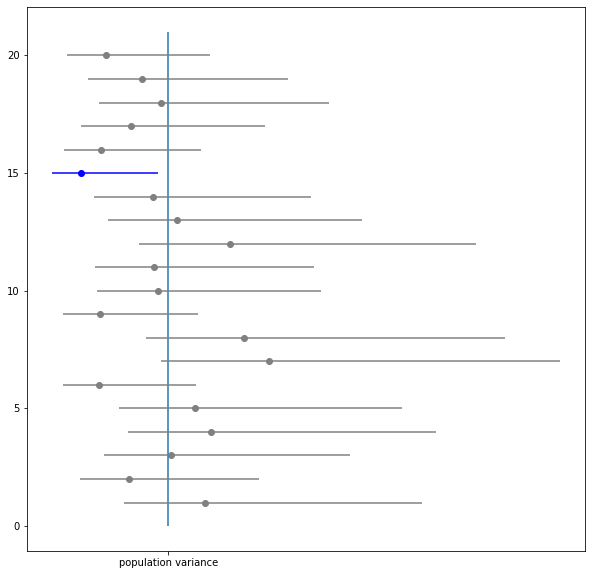

In [34]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

rv = stats.chi2(df=n-1)
n_samples = 20
ax.vlines(p_var, 0, 21)
for i in range(n_samples):
    sample_ = samples[i]
    u_var_ = np.var(sample_, ddof=1)
    lcl = (n-1) * u_var_ / rv.isf(0.025)
    ucl = (n-1) * u_var_ / rv.isf(0.975)
    if lcl <= p_var <= ucl:
        ax.scatter(u_var_, n_samples-i, color='gray')
        ax.hlines(n_samples-i, lcl, ucl, 'gray')
    else:
        ax.scatter(u_var_, n_samples-i, color='b')
        ax.hlines(n_samples-i, lcl, ucl, 'b')
ax.set_xticks([p_var])
ax.set_xticklabels(['population variance'])

plt.show()

신뢰구간을 1만번 계산하여 신뢰구간이 모분산에 포하된 것은 몇 %인지 다음과 같은 시뮬레이션을 통해 확인 할 수 있다.   
약 96%가 모분산을 포함하고 있음을 확인 할 수 있다. 

In [35]:
rv = stats.chi2(df=n-1)
cnt = 0
for sample_ in samples:
    u_var_ = np.var(sample_, ddof=1)
    lcl = (n-1) * u_var_ / rv.isf(0.025)
    ucl = (n-1) * u_var_ / rv.isf(0.975)
    if lcl <= p_var <= ucl:
        cnt += 1
        
cnt / len(samples)

0.964